One of the most difficult things when getting involved in custom development for any platform is installing and preparing the development environment.  The exercise gets more complicated and potentially troublesome when then trying to interface from the development environment to a production system.  OpendTect is a production platform for seismic and well log interpretation, visualization, and processing with an open development environment that allows the development and extension of functionality, in the form of plug-ins, by researchers and professional developers.  Traditionally this extension was done in the native C++ of OpendTect’s architecture.  

The OpendTect Machine Learning plug-in is designed for operational geo-scientists, experimental geo-scientists and research geo-scientists. The plug-in links OpendTect to the rich environment enabled for machine learning development powered by Python, TensorFlow, Keras and Scikit Learn.  The plug-in offers workflows for: seismic, wells, and seismic-to-wells applications.

TensorFlow is an end-to-end open-source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.  The trouble with it is that it is perhaps too granular to be used directly by most scientists directly.  Thus, support libraries that wrap Tensorflow have been created, Keras and ScikitLearn being the most well-known.  The advantage in OpendTect, is that the Machine Learning plug-in provides a clean and understandable interface to Tensorflow directly in the OpendTect application, or programmatically through the Python development environment.

With the addition of the Machine Learning Professional plug-in, OpendTect development is further extended by allowing Python as an additional development environment.  Python is a powerful programming language with many of the benefits of C++ or Java but coupled with a simpler syntax and an interactive command line interpreter.  

When coupled with countless easily installable development toolkits and libraries for data analytics and machine learning, and an interactive “notebook” engine, Python approaches most closely the famous “repeatable science” paradigm 

Perhaps the greatest advantage that comes with OpendTect’s implementation of the Python development environment is that it requires no installation or preparation by the end user.  Starting from within OpendTect, a Python shell, or integrated development environment (IDE), can be launched, and one with direct access to the OpendTect-Python link, libraries and data structures that are a pre-requisite to further research and development.  An advantage of Python is its flexibility, and the ability to add new tools and libraries from the command line, so, even this environment can be easily customized with additional analytics libraries.

To get started, we setup the python environment in OpendTect.

Under the menubar item Utilities / Installation / Python Settings we can tailor the environment to our liking.

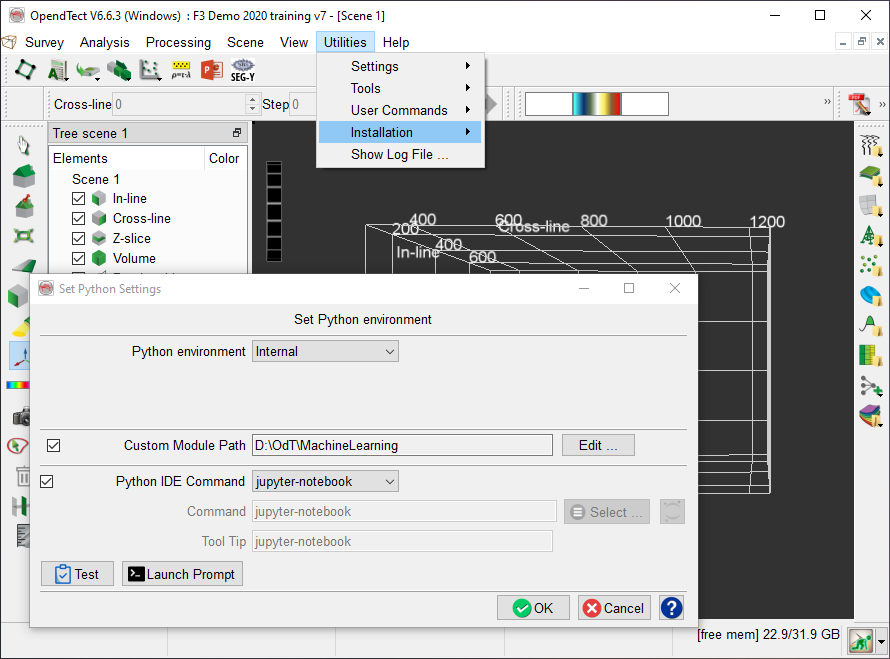


Typically we can just use the internal environment and it will automatically choose the CPU or GPU as your system will support.

Select a Custom module path which is where you will store your custom Python modules

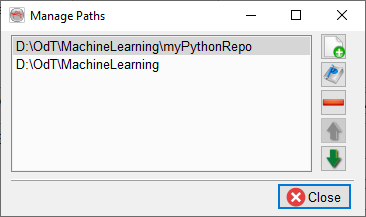


We can also select a custom IDE command to launch from a shortcut on the OpenTect desktop, or we can use the "Launch Prompt" to get a terminal window:

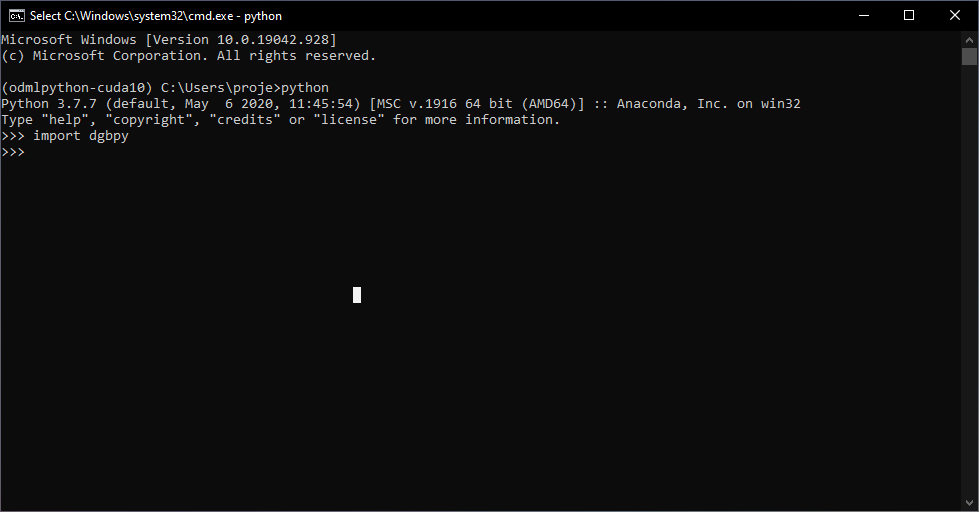


Here we can test our environment by starting Python, and importing dgbpy, if there is no error message, things are working correctly and we can move on. (Ctrl-Z to exit on windows, Ctrl-D on linux)

We need to install jupyter-notebook so that we can run this notebook (see notes at bottom of this notebook for Windows users and making sure the kernel is setup properly, linux users can continue without additonal setup.

At the command prompt install notebook with the following command:

conda install notebook

Change directories to the root of the webinar examples and then start the notebook with the following command:

jupyter-notebook

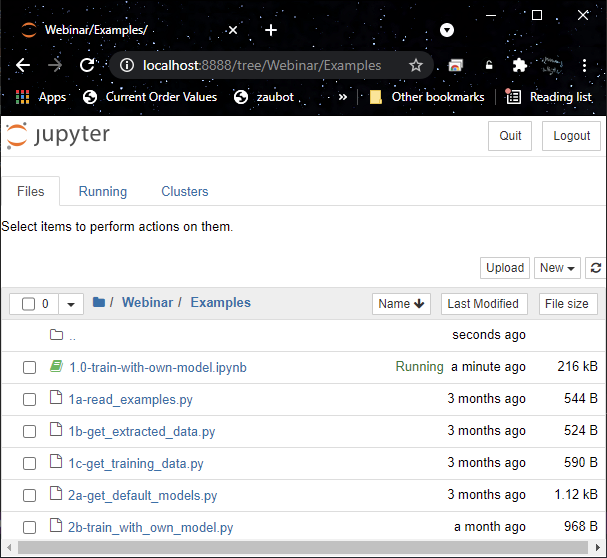


The notebook is 1.0-train-with-own-model, click on that, and it will open in a new window.

You will need to TRUST the notebook before it will run.

We provide some example files for your experimentation, you will need to adjust the paths and make modifications to support your needs.

The provided UNet file is for experimentation -- you will have to make modifications to get the final results!  Good luck!


*In this demonstration notebook we will show how to access training data that has been
already extracted from the project, using the machine learning plugin.*

*Before we start, let's look at how we extract training data in OpendTect!*
<br><br>
<span style="color:red">
Because this is a markdown block, we can use markdown formatting, and when run, it will
also be interpreted and pretty-printing will result.
</span>


*The following cell shows the OpendTect ML-API imports that we will rely on, and any other 
imports as we may requrie to support our work.*


In [1]:
from dgbpy import hdf5 as dgbhdf5
from dgbpy import dgbkeras
from dgbpy import mlio as dgbmlio
from dgbpy import mlapply as dgbmlapply
from dgbpy import keystr as dgbkeys
import json
from myPythonRepo import unet3d


Using TensorFlow backend.


In [2]:
print('Can use GPU: ' + str(dgbkeras.can_use_gpu()))


Can use GPU: True


In [3]:
print(dgbkeras.get_keras_infos())


{"haskerasgpu": true, "prefercpu": false, "batchsizes": ["1", "2", "4", "8", "16", "32", "48", "64", "96", "128", "144", "192", "256", "288", "384", "448", "480", "512", "576", "640", "768", "896", "960", "1024", "1152", "1280", "1344", "1408", "1536", "1664", "1792", "1920", "2048", "2176", "2304", "2432", "2496", "2560", "2688", "2816", "2880", "2944", "3072", "3584", "3840", "4352", "4608", "4992", "5120"], "defaultbatchsz": 32}


Data exploration is a key aspect of our data-cleaning and data-shaping operations.  We may have bad or missing data points in our dataset, and we wish to efficiently account for these before we move on to more complex tasks like building and training machine learning models.

We can load data created in OpenDtect and manipulate wiyhin our Python environment.

Alternatively, we may wish to work with models that we created within the Machine Learning plugin, adjust them, and then use them in our production workflow, to be distributed within our institution.  The OpendTect-Python Machine Learning development environment precisely and efficiently provides for that kind of flexibility.

This webinar focuses on that aspect of working with the Machine Learning Plugin and Python.


*Typically, the training data will reside in the NLAs directory under the current project.
It may be that in your organization, you store it in the cloud or on a shared drive, so we can
specifiy the path, and then create an object that links to that training file.*

*(note: under windows paths are using \ which Python normally treats as an escape character, so we 
 can do one of three things, do a \\ which tells python to treat it as an unescaped \, or we can use
 linux/macos /, or we can use the windows path as a raw string, with the r-prefix r"" -- as I copy and
 paste using the OS file explorer, I prefer the raw string method)*
 

In [4]:
#imgexfilenm = 'P:\\Git\\python-dgb-ml\\exampledata\\Fault_Likelihood_input_single_surv_single_attr.h5'
imgexfilenm = r'P:\OdT_projects\F3_Demo_2020\NLAs\webinar-training1.h5'
imgdp = dgbmlapply.getScaledTrainingData(imgexfilenm, split=0.2)


Process: 'Data pre-loading'
Started: Wed 21 Apr 2021, 19:20:23
Finished: Wed 21 Apr 2021, 19:20:23



*In the next few cells we will query the object to get it's properties:*


In [5]:
infos = dgbmlio.getInfo(imgexfilenm, quick=True)
print(infos)


{'learntype': 'Seismic Image Transformation', 'inp_shape': [16, 16, 16], 'out_shape': [16, 16, 16], 'classification': False, 'interpolated': True, 'examples': {'F3 Demo 2020': {'target': 'Fault Likelihood', 'id': 0, 'component': 0, 'collection': {'Fault Likelihood': {'dbkey': '100010.36', 'id': 0}}}}, 'input': {'F3 Demo 2020': {'collection': {'4 Dip steered median filter': {'id': 0, 'dbkey': '100010.4'}}, 'id': 0, 'scale': StandardScaler()}}, 'filenm': 'P:\\OdT_projects\\F3_Demo_2020\\NLAs\\webinar-training1.h5', 'estimatedsize': 5242880}


In [6]:
infos = imgdp[dgbkeys.infodictstr]
print(infos)


{'learntype': 'Seismic Image Transformation', 'inp_shape': [16, 16, 16], 'out_shape': [16, 16, 16], 'classification': False, 'interpolated': True, 'examples': {'F3 Demo 2020': {'target': 'Fault Likelihood', 'id': 0, 'component': 0, 'collection': {'Fault Likelihood': {'dbkey': '100010.36', 'id': 0}}}}, 'input': {'F3 Demo 2020': {'collection': {'4 Dip steered median filter': {'id': 0, 'dbkey': '100010.4'}}, 'id': 0, 'scale': StandardScaler()}}, 'filenm': 'P:\\OdT_projects\\F3_Demo_2020\\NLAs\\webinar-training1.h5', 'datasets': {'F3 Demo 2020': {'Fault Likelihood': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 

In [7]:
inpshape = infos[dgbkeys.inpshapedictstr]
print(inpshape)


[16, 16, 16]


In [8]:
nrattribs = dgbhdf5.getNrAttribs(infos)
print(nrattribs)


1



*We have a previously built UNet that we will use for training


In [9]:
model = unet3d.unet_AH((*inpshape, nrattribs))



*Now we will set some training parameters and train the model


In [10]:
trainpars = dgbkeras.keras_dict
trainpars['nbchunk'] = 1
trainpars['epoch'] = 15
trainpars['batch'] = 4
model = dgbkeras.train(model, imgdp, trainpars)
modeltype = dgbmlio.getModelType(infos)


Starting training iteration 1/1
Training on 32 batches of 4 samples
Validate on 8 batches of 4 samples
Epoch 1/15
32/32 [==============================] - 3s 96ms/step - loss: 0.3225 - accuracy: 0.0048 - val_loss: 0.3380 - val_accuracy: 0.0018
Epoch 2/15
32/32 [==============================] - 1s 27ms/step - loss: 0.3229 - accuracy: 0.0030 - val_loss: 0.2857 - val_accuracy: 0.0013
Epoch 3/15
32/32 [==============================] - 1s 27ms/step - loss: 0.3230 - accuracy: 0.0022 - val_loss: 0.3279 - val_accuracy: 9.9182e-04
Epoch 4/15
32/32 [==============================] - 1s 27ms/step - loss: 0.3213 - accuracy: 0.0016 - val_loss: 0.3441 - val_accuracy: 6.9427e-04
Epoch 5/15
32/32 [==============================] - 1s 28ms/step - loss: 0.3216 - accuracy: 0.0014 - val_loss: 0.3368 - val_accuracy: 6.4087e-04
Epoch 6/15
32/32 [==============================] - 1s 28ms/step - loss: 0.3223 - accuracy: 0.0014 - val_loss: 0.3100 - val_accuracy: 5.9509e-04
Epoch 7/15
32/32 [=================


*Now we would like to save the new model back in the database


In [11]:
outfnm = dgbmlio.getSaveLoc('training-model1i', modeltype, None)
dgbmlio.saveModel(model, imgexfilenm, dgbkeys.kerasplfnm, infos, outfnm)

Saving model.
Model saved.


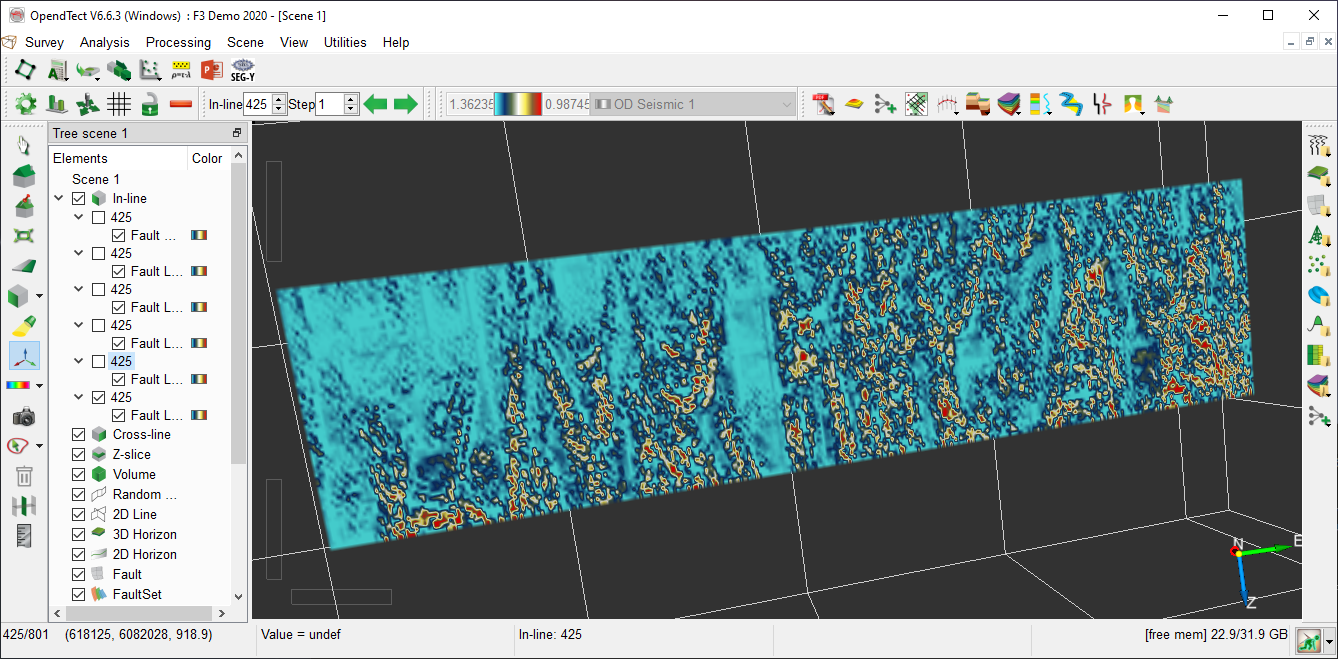

*We can see that using such a small training dataset was sub-optimal, so we can use
a larger training set, and save it as a new model

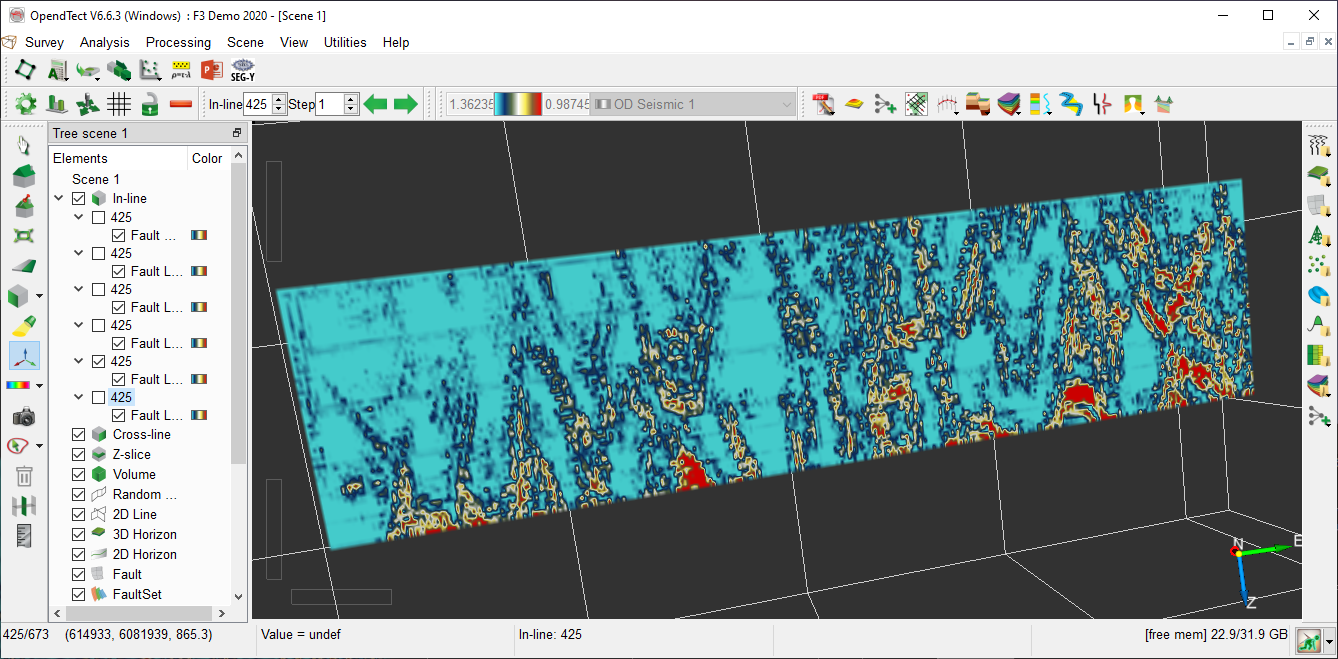

And we can continue to refine our model (an excercise left to the reader for homework!)

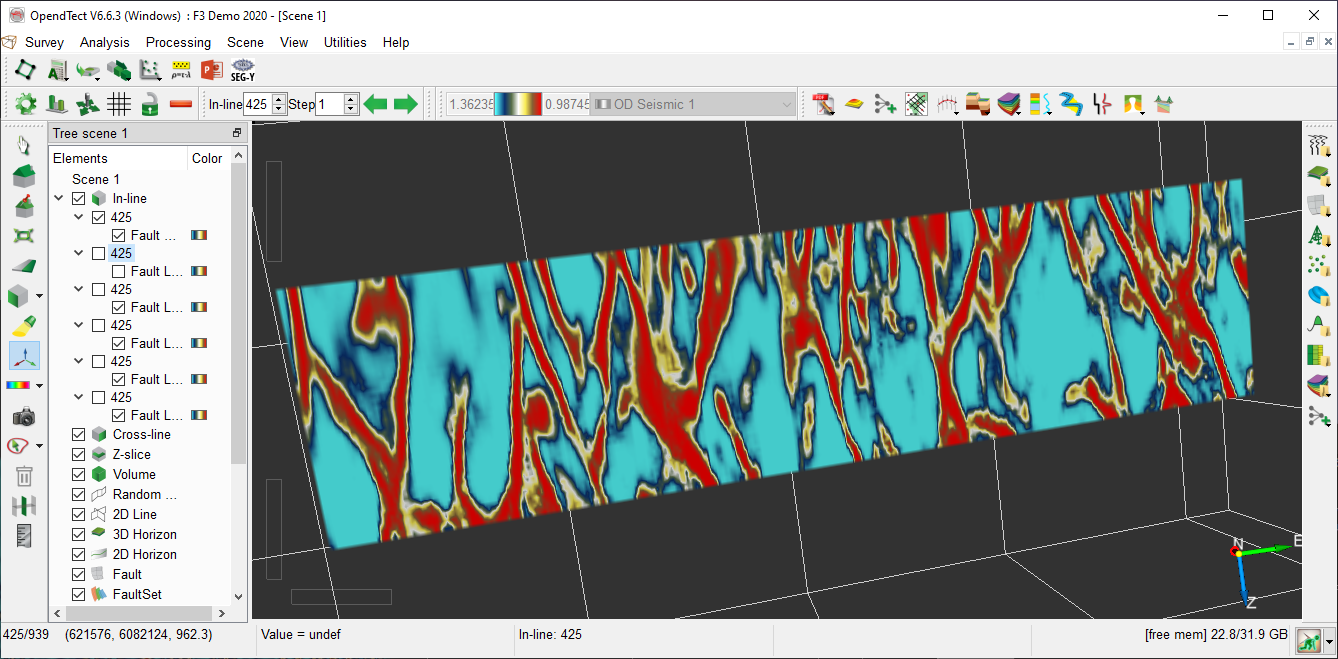

*We may also wish to adjust the training parameters, or even make modifications to
our UNet architecture


In [ ]:
# larger training set 32x bigger than 1st
imgexfilenm = r'P:\OdT_projects\F3_Demo_2020\NLAs\training0.h5'

# or one that is 630x bigger
#imgexfilenm = r'P:\OdT_projects\F3_Demo_2020\NLAs\training0a.h5'

imgdp = dgbmlapply.getScaledTrainingData(imgexfilenm, split=0.2)
infos = imgdp[dgbkeys.infodictstr]
inpshape = infos[dgbkeys.inpshapedictstr]
nrattribs = dgbhdf5.getNrAttribs(infos)



We hope that this tutorial was useful, and we appreciate any questiona and comments for future webinars or desired tutorials.

Some additional code and notes are below.

In [ ]:
modelbig = unet3d.unet_AH((*inpshape, nrattribs))
trainpars = dgbkeras.keras_dict
trainpars['nbchunk'] = 2
trainpars['epoch'] = 15
trainpars['batch'] = 4
trainpars['patience'] = 5
modelbig = dgbkeras.train(modelbig, imgdp, trainpars)
modeltype = dgbmlio.getModelType(infos)

outfnm = dgbmlio.getSaveLoc('modelbigw', modeltype, None)
dgbmlio.saveModel(modelbig, imgexfilenm, dgbkeys.kerasplfnm, infos, outfnm)


Note for windows users:  You will need to modify the path to your jupyter server setup by editing a kernel.json file for both the cuda10 and cpumkl environments.

The paths are:

{installdir}\OpendTect\Python\envs\odmlpython-cuda10\share\jupyter\kernels\python3
{installdir}\OpendTect\Python\envs\odmlpython-cpu-mkl\share\jupyter\kernels\python3

The file looks like:

{
 "argv": [
  "C:/Tools/OpendTect/Python/envs/odmlpython-cuda10/python.exe",
  "-m",
  "ipykernel_launcher",
  "-f",
  "{connection_file}"
 ],
 "display_name": "Python 3",
 "language": "python"
}

please change the root directory to match your python installation.  In future versions of Opendtect this will be modified for Windows users automatically.  FOr Linux users, this is setup already.